In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [20]:
experiment_directory = Path.cwd()

In [21]:
# Load the output data
outputs_df = pd.read_csv(experiment_directory / "outputs.csv")

In [22]:
outputs_df.head()

,Unnamed: 0,simulation_id,wind_speed,fuel_load_category,control_fuel_load,treatment_fuel_load,control_fuel_height,treatment_fuel_height,control_fuel_moisture_content,treatment_fuel_moisture_content,control_sav,treatment_sav,circle_radius,fuel_model,resolution,CONTROL_ROS,NORMALIZED_ROS
0,0,0,0.5000,high,0.31,0.155,0.6096,0.1524,0.15,0.15,6561,6561,1.8288,pfm,coarse,0.0,0.0
1,1,1,0.5455,high,0.31,0.155,0.6096,0.1524,0.15,0.15,6561,6561,1.8288,pfm,coarse,0.0,0.0
2,2,2,0.5909,high,0.31,0.155,0.6096,0.1524,0.15,0.15,6561,6561,1.8288,pfm,coarse,0.0,0.0
3,3,3,0.6364,high,0.31,0.155,0.6096,0.1524,0.15,0.15,6561,6561,1.8288,pfm,coarse,0.0,0.0
4,4,4,0.6818,high,0.31,0.155,0.6096,0.1524,0.15,0.15,6561,6561,1.8288,pfm,coarse,0.0,0.0


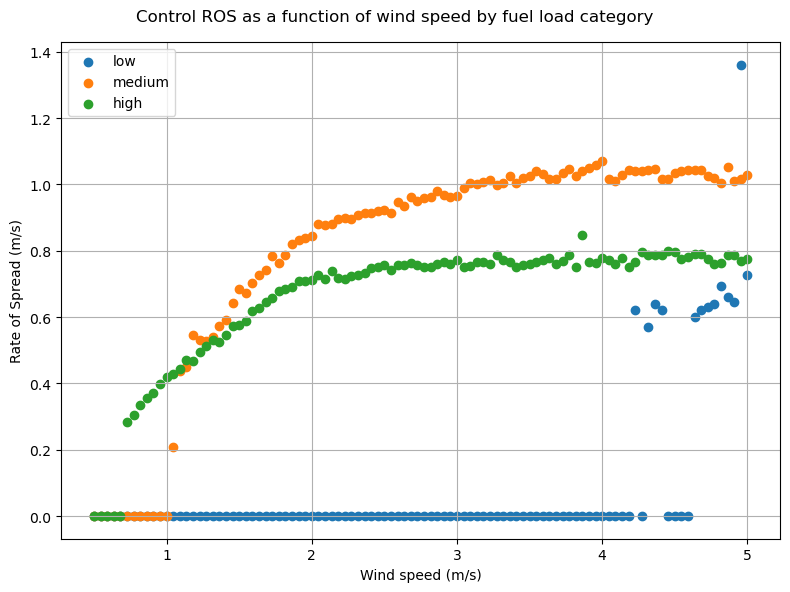

In [25]:
# Plot the ros as a function of wind speed
fig, ax = plt.subplots(figsize=(8, 6))
for fuel_load_category in ["low", "medium", "high"]:
    outputs_fuel_load_df = outputs_df[outputs_df["fuel_load_category"] == fuel_load_category]
    ax.scatter(outputs_fuel_load_df["wind_speed"][:, :, 3], outputs_fuel_load_df["CONTROL_ROS"], label=fuel_load_category)
# ax.plot(outputs_df["wind_speed"], outputs_df["ros"])
ax.set_xlabel("Wind speed (m/s)")
ax.set_ylabel("Rate of Spread (m/s)")
ax.grid(True)
ax.legend()
fig.suptitle("Control ROS as a function of wind speed by fuel load category")
plt.tight_layout()
# plt.savefig(experiment_directory / "control_ros_by_fuel_load_category_100_threshold.png")
plt.show()

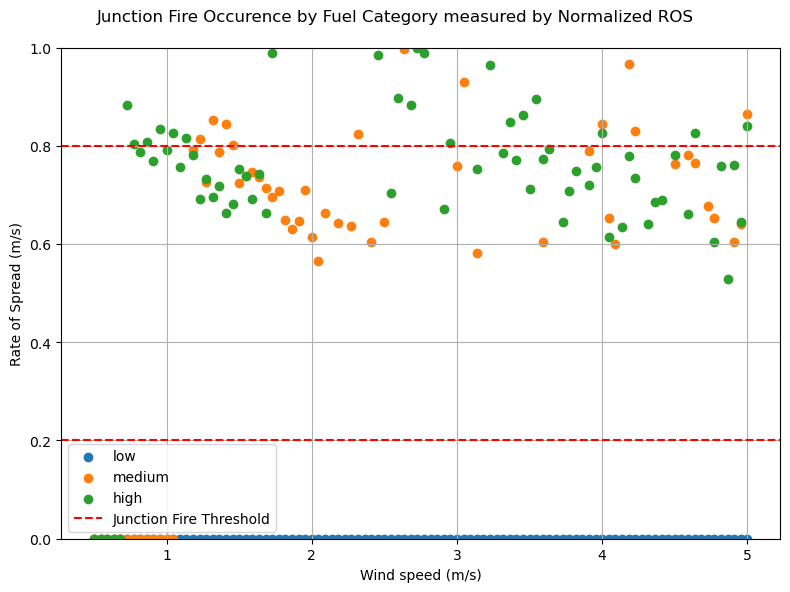

In [26]:
# Plot the normalized ros as a function of wind speed
fig, ax = plt.subplots(figsize=(8, 6))
for fuel_load_category in ["low", "medium", "high"]:
    outputs_fuel_load_df = outputs_df[outputs_df["fuel_load_category"] == fuel_load_category]
    ax.scatter(outputs_fuel_load_df["wind_speed"], outputs_fuel_load_df["NORMALIZED_ROS"], label=fuel_load_category)
# ax.plot(outputs_df["wind_speed"], outputs_df["ros"])
# Add a horizontal line at 0.8 labeled "Junction Fire Threshold"
ax.axhline(0.8, color="red", linestyle="--", label="Junction Fire Threshold")
ax.axhline(0.2, color="red", linestyle="--")
ax.set_ylim(0, 1)
ax.set_xlabel("Wind speed (m/s)")
ax.set_ylabel("Rate of Spread (m/s)")
ax.grid(True)
ax.legend()
fig.suptitle("Junction Fire Occurence by Fuel Category measured by Normalized ROS")
plt.tight_layout()
# plt.savefig(experiment_directory / "normalized_ros_by_fuel_load_category_100_threshold.png")
plt.show()